In [2]:
require("tidyverse")
require("caret")
require("corrplot")
require("e1071")

Loading required package: tidyverse
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.0       v purrr   0.2.5  
v tibble  2.0.1       v dplyr   0.8.0.1
v tidyr   0.8.1       v stringr 1.3.1  
v readr   1.1.1       v forcats 0.3.0  
Warning message:
"package 'ggplot2' was built under R version 3.5.2"Warning message:
"package 'tibble' was built under R version 3.5.2"Warning message:
"package 'dplyr' was built under R version 3.5.2"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Loading required package: caret
Loading required package: lattice

Attaching package: 'caret'

The following object is masked from 'package:purrr':

    lift

Loading required package: corrplot
Warning message:
"package 'corrplot' was built under R version 3.5.2"corrplot 0.84 loaded
Loading required package: e1071
Warning message:
"package 'e1071' was built unde

In [1]:
df <- read.csv('../datasets/diabetes.csv')

In [4]:
head(df,3)

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1


In [5]:
set.seed(100)
split_rule <- sample(nrow(df), 0.75*nrow(df), replace = FALSE)
train <- df[split_rule,]
test <- df[-split_rule,]

In [6]:
# Alternatively, using the Caret package also works, but it includes extra steps
trainIndex = createDataPartition(df$Outcome,
                       p=0.7, list=FALSE,times=1)
train_x = df[trainIndex,]
test_x = df[-trainIndex,]

In [7]:
# Prop table to take probability.
# Use this to make sure the train and test sets are the same in distribution
prop.table(table(train$Outcome))


        0         1 
0.6423611 0.3576389 

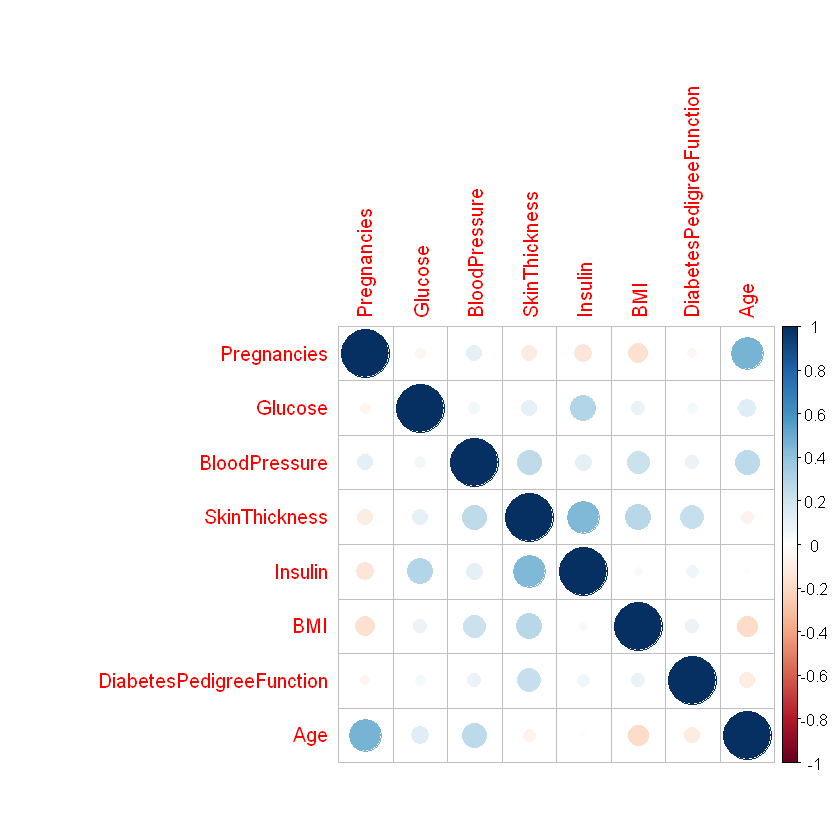

In [8]:
train %>%
  filter(Outcome == 1) %>%
  select(-Outcome) %>%
  select_if(is.numeric) %>%
  cor() %>%
  corrplot::corrplot()

In [9]:
# This will fail if you do not set Outcome as the correct type (factor, or categorical variable.
test$Outcome <- as.factor(test$Outcome)
# This package in R is Gaussian by design. Other implementations/methods are avaiable in other packages
gauss_NB = naiveBayes(as.factor(Outcome) ~., data = train)
#What does the model say? Print the model summary
gauss_NB 


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
        0         1 
0.6423611 0.3576389 

Conditional probabilities:
   Pregnancies
Y       [,1]     [,2]
  0 3.232432 3.012175
  1 4.883495 3.856704

   Glucose
Y       [,1]     [,2]
  0 108.8838 26.24721
  1 142.4417 31.12577

   BloodPressure
Y       [,1]     [,2]
  0 68.28919 17.75397
  1 70.46117 23.02207

   SkinThickness
Y       [,1]     [,2]
  0 19.41351 14.95447
  1 22.15534 17.94124

   Insulin
Y        [,1]     [,2]
  0  68.38378 100.9886
  1 101.19903 144.1537

   BMI
Y       [,1]     [,2]
  0 30.41703 7.775931
  1 35.38398 7.189999

   DiabetesPedigreeFunction
Y        [,1]      [,2]
  0 0.4073757 0.2796142
  1 0.5429029 0.3694381

   Age
Y       [,1]     [,2]
  0 31.14865 12.05192
  1 36.60194 10.88731


In [10]:
# Prediction on the dataset
predicted_labels <- predict(gauss_NB,test)

In [11]:
# The kind of outputs we get from the model - Guass NB. 
# It will predict whether outcome is 0 or 1.

head(predicted_labels,3)

[1] 1 0 1
Levels: 0 1

In [12]:
# Confusion matrix to check accuracy
xtab <- table(predicted_labels, test$Outcome)

confusionMatrix(xtab)
# table does record a lot of data; it's not just a n x n matrix

Confusion Matrix and Statistics

                
predicted_labels   0   1
               0 105  27
               1  25  35
                                          
               Accuracy : 0.7292          
                 95% CI : (0.6605, 0.7906)
    No Information Rate : 0.6771          
    P-Value [Acc > NIR] : 0.06969         
                                          
                  Kappa : 0.3754          
 Mcnemar's Test P-Value : 0.88971         
                                          
            Sensitivity : 0.8077          
            Specificity : 0.5645          
         Pos Pred Value : 0.7955          
         Neg Pred Value : 0.5833          
             Prevalence : 0.6771          
         Detection Rate : 0.5469          
   Detection Prevalence : 0.6875          
      Balanced Accuracy : 0.6861          
                                          
       'Positive' Class : 0               
                                          